## 2A.
Evaluating `BFS`, `DFS`, `UCS`, `Iterative Deepening`, `Bidirectional Search`, `Greedy`, and `A*` Search algorithms using the graph from Question 2 and benchmarking them. 
    - The benchmark should be finding the path between each node. Randomly pick 10 cities. Find the path between them.

        For each algorithm :
        - What is the average time taken for each path search?
        - What is the solution length?

        Each experiment should be run `10` times


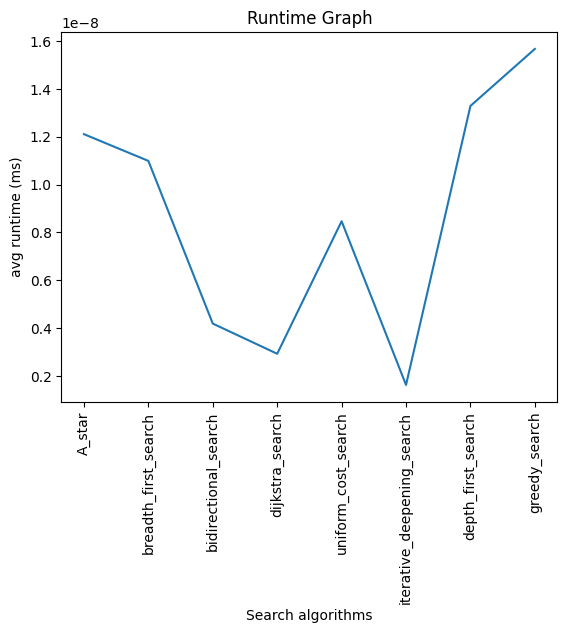

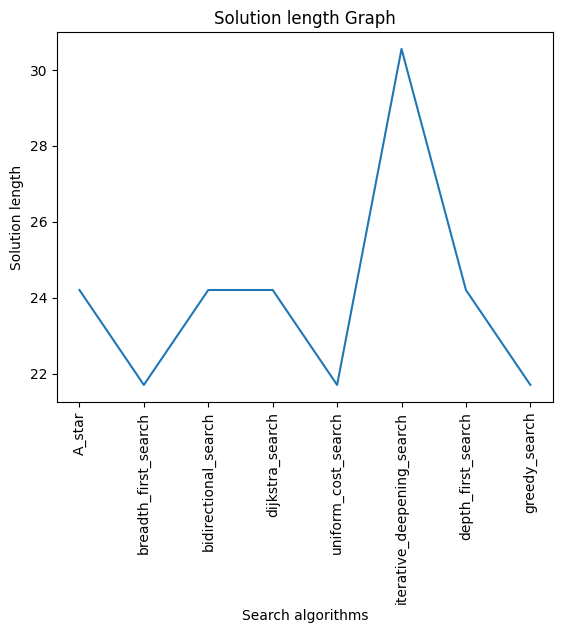

In [5]:

from runSearchExperimentTests import Experiment
from undirectedGraph import Graph
from romaniaCity import Romania
from matplotlib import pyplot as plt


romania_graph: Graph = Romania().get_city()
romania_coordinates = Romania().get_coordinates()

cities_list = list(romania_graph.get_nodes().keys())
search_algorithms = ["A_star", "breadth_first_search", "bidirectional_search", "dijkstra_search", \
                    "uniform_cost_search", "iterative_deepening_search", "depth_first_search", \
                    "greedy_search"]

search_runtime = [0.0 for _ in range(8)]
search_solution_length = [0.0 for _ in range(8)]

search_runtime, search_solution_length = Experiment.run(romania_graph, romania_coordinates, 10)

plt.plot(search_algorithms, search_runtime)
plt.xticks(rotation=90)
plt.xlabel('Search algorithms') 
plt.ylabel('avg runtime (ms)')
plt.title("Runtime Graph") 
plt.show()

plt.plot(search_algorithms, search_solution_length)
plt.xticks(rotation=90)
plt.xlabel('Search algorithms') 
plt.ylabel('Solution length') 
plt.title("Solution length Graph") 
plt.show()


## 2B
Create random graphs with a number of nodes **n = `10`, `20`, `30`, `40`.**  Randomly connect nodes with the probability of edges **p = `0.2`,  `0.4`,  `0.6`,  `0.8`.** In total, you will have 16 graphs. The generated node will have randomly generated x, and y value that represents their locations. Use those coordinates to compute the heuristic functions. 

Randomly select 10 nodes and apply the above algorithms to find paths between them in all 16 graph settings. 
Register the time taken to find a solution for each algorithm and graph. Run each experiment 5 times and have the average of the time taken in the five experiments.
Use matplotlib.pyplot to plot their average time and solution (found path) length on each graph size. 

In [2]:

from graphGenerator import Graph_Generator


for num_nodes in [10, 20, 30, 40]:
    for edge_prob in [0.2, 0.4, 0.6, 0.8]:
        graph, coordinates = Graph_Generator.generate(num_nodes, edge_prob)
        
        



a <neighbors> : [('b', 9.30588459540696), ('c', 3.45882712261728), ('d', 1.9506251787132236), ('e', 8.378814522243184)]
b <neighbors> : [('a', 9.30588459540696), ('c', 0.7992478594614778)]
c <neighbors> : [('a', 3.45882712261728), ('b', 0.7992478594614778)]
d <neighbors> : [('a', 1.9506251787132236)]
e <neighbors> : [('a', 8.378814522243184)]
{'a': (6.969091585568675, 7.452661334631591), 'b': (5.3869562810236555, 3.5908703106799003), 'c': (9.216748434543279, 0.3575518271045086), 'd': (5.18935416964182, 0.2598472830828169), 'e': (4.3440108038208685, 5.799971043377736)}


## 3.1 and 3.2.
There are several centralities types. Compute the Degree, Closeness, Eigenvector, Katz, PageRank, and Betweenness centralities on the graph from Question 2. (You have to read online how to calculate these centralities). 

* Compute these centralities for each node
* Report a table containing top-ranked cities in each centrality category



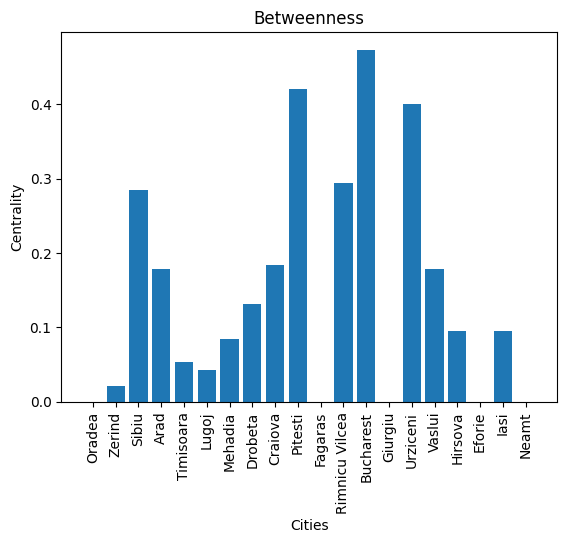

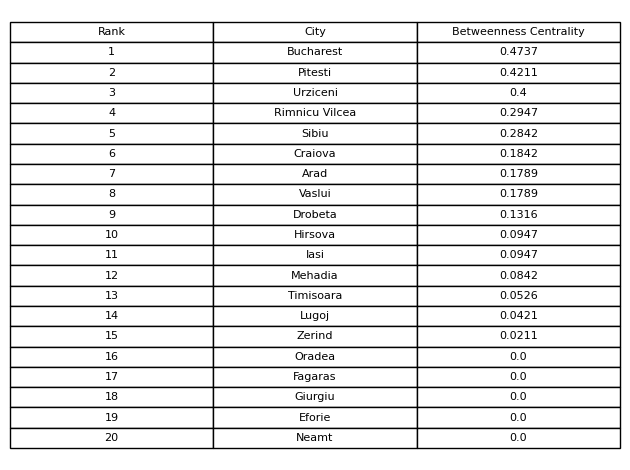

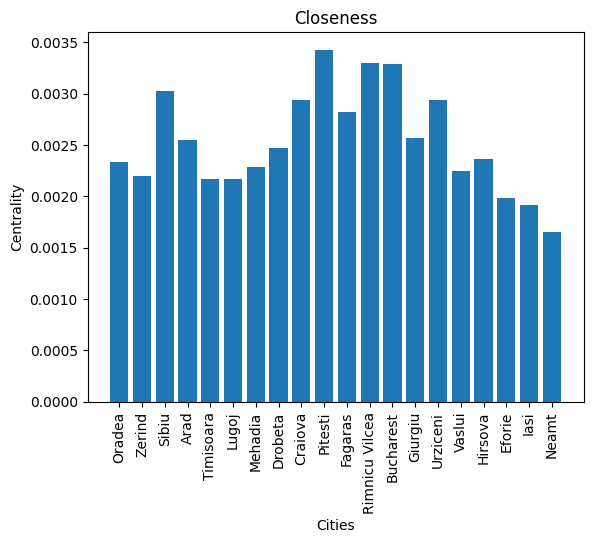

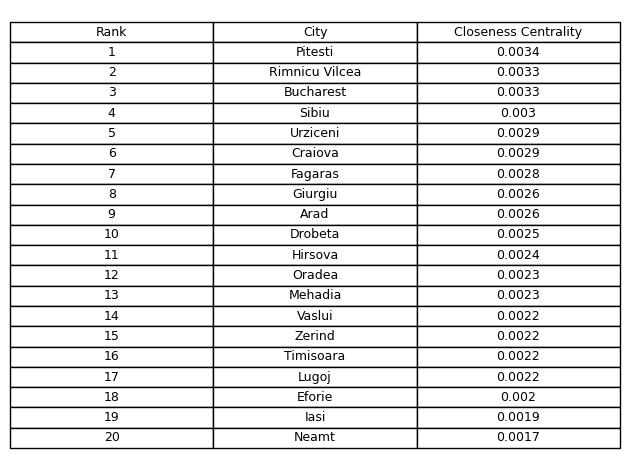

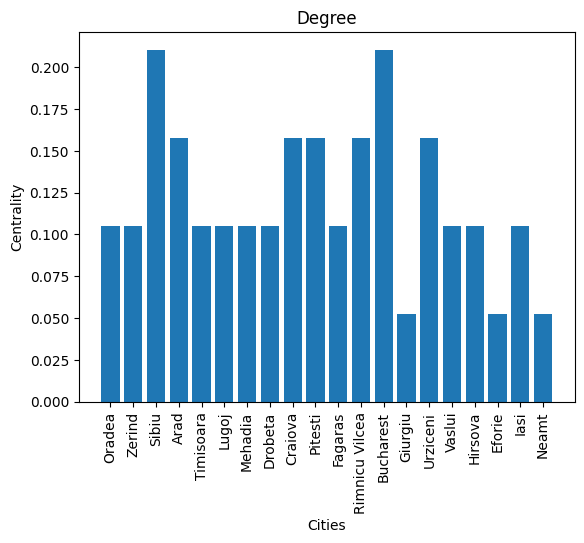

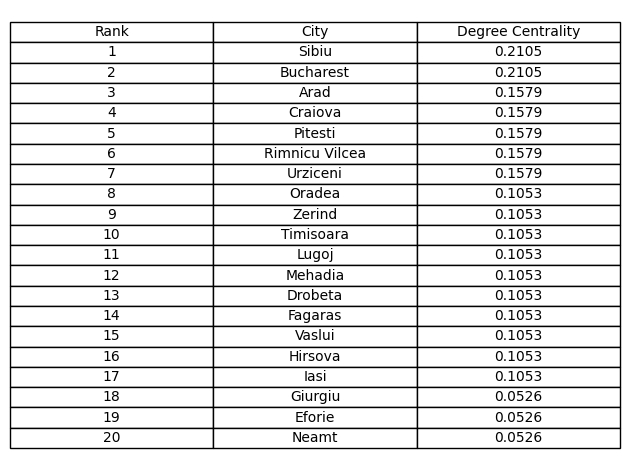

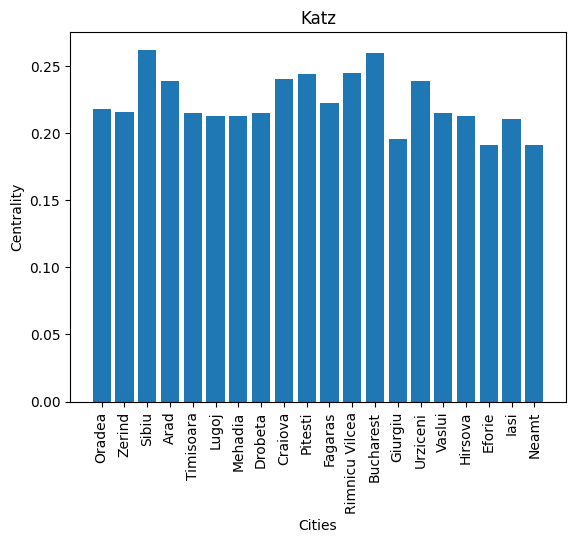

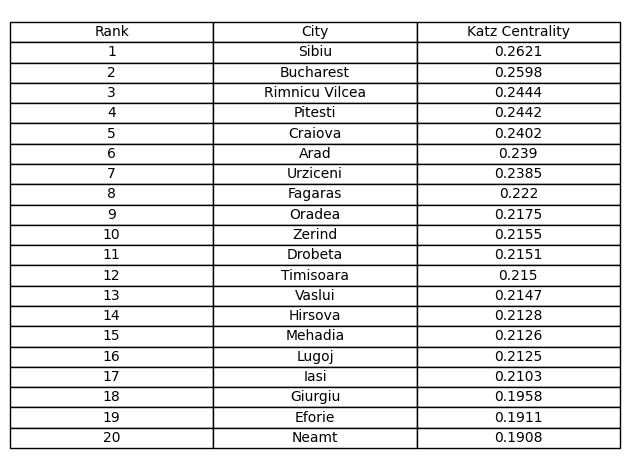

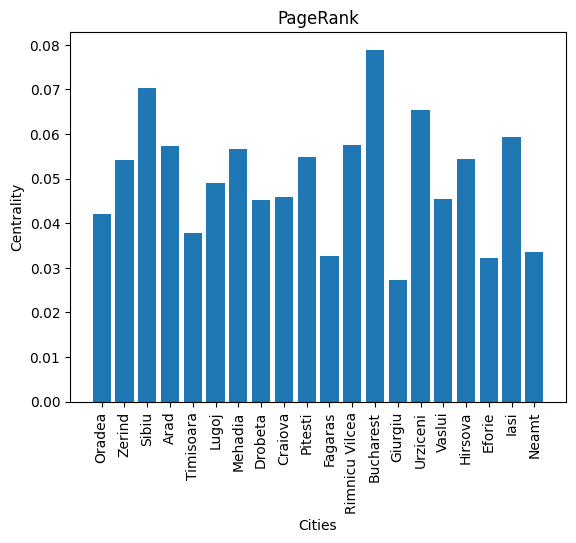

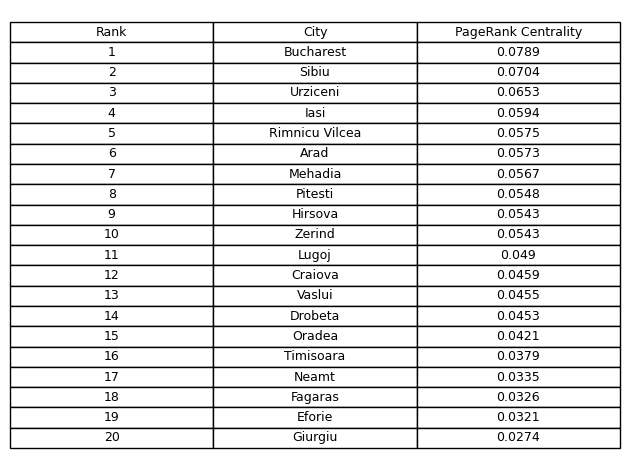

In [3]:
from typing import Dict, List, Mapping, Tuple
from undirectedGraph import Graph
from centrality import Centrality as center
from romaniaCity import Romania
import matplotlib.pyplot as plt

# compute the centrality of every Romanian city.
romania = Romania()
romania_graph: Graph = romania.get_city()
romania_coordinates = romania.get_coordinates()

betweenness_centrality = center().betweenness_centrality(romania_graph)
closeness_centrality = center().closeness_centrality(romania_graph)
degree_centrality = center().degree_centrality(romania_graph)
# eigenvector_centrality = center().eigenvector_centrality(romania_graph)
katz_centrality = center().katz_centrality(romania_graph)
pagerank_centrality = center().pagerank_centrality(romania_graph)

centrality_list : List[Tuple[Mapping,str]] = [(betweenness_centrality, "Betweenness"),\
                (closeness_centrality, "Closeness"),(degree_centrality, "Degree"),\
                # (eigenvector_centrality, "Eigenvector"),\
                      (katz_centrality, "Katz"),\
                (pagerank_centrality, "PageRank")]

x_labels = list(romania_graph.get_nodes())

for centrality in centrality_list:
    y_values = []
    centrality_dict, centrality_name = centrality

    for key in x_labels:
        y_values.append(centrality_dict[key])

    # plot the bar chart
    plt.bar(x_labels, y_values)
    plt.xticks(rotation=90)
    plt.xlabel('Cities') 
    plt.ylabel('Centrality')
    plt.title(centrality_name)
    plt.show()

    # create a sorted list of cities by centrality
    sorted_cities = sorted(x_labels, key=lambda x: centrality_dict[x], reverse=True)

    # create a table displaying the ranking of cities by centrality
    fig, ax = plt.subplots()
    ax.axis('off')
    ax.axis('tight')
    table_data = [["Rank", "City", centrality_name + " Centrality"]]
    for i in range(len(sorted_cities)):
        table_data.append([str(i+1), sorted_cities[i], round(centrality_dict[sorted_cities[i]], 4)])
    ax.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
    fig.tight_layout()
    plt.show()



## 3.3.

* Summarize your observations

__Summary__



This is some summary